# Keras Basics

In this notebook, we will be working through a simple regression project to understand the basics of the [Keras](https://keras.io/) syntax. Keras has been intergrated as a module of `TensorFlow 2.0` onward and is now the main API choice when working with TensorFlow.

## The Data

For this notebook, we will use a very simple fake data set.

> [fake_reg.csv](data/fake_reg.csv)

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Loading the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/fake_reg.csv')
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


### Exploring the Data

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

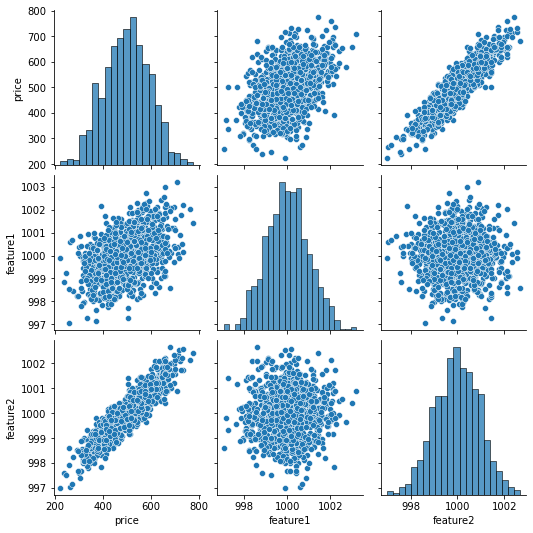

In [4]:
sns.pairplot(df)

## Train/Test Data Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Features (call '.values' to convert Pandas dataframe to Numpy array for Keras)
X = df[['feature1', 'feature2']].values

print(type(X))
X

<class 'numpy.ndarray'>


array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [7]:
# Label (call '.values' to convert Pandas series to Numpy array for Keras)
y = df['price'].values
type(y)

numpy.ndarray

In [8]:
# Split data into a training data set and a test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
X_test.shape

(300, 2)

In [11]:
y_train.shape

(700,)

In [12]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

> [Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
# Define a scaler instance
scaler = MinMaxScaler()

In [15]:
# Fit the newly defined scaler to the training data.
# What fit() method actually does is computing the minimum and maximum to be used for later scaling.
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set.
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

## Building a Regression Model with `TensorFlow` 2.x

We will use `Keras` module of `TensorFlow` 2.x to create our model. There are two ways to create models through the `TensorFlow` 2.x Keras API, either pass in a list of layers all at once, or add them one by one. Let's try both methods.

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [18]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2),
])

### Model - adding in layers one by one

In [19]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

In [20]:
model = Sequential()

# Add three layers, each has 4 nodes (artificial neurons)
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

# Add a final output node for prediction
model.add(Dense(1))

# Configures the model for training
model.compile(optimizer='rmsprop', loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem we are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

### Training

Below are some common definitions that are necessary to know and understand to correctly utilize `Keras`:

* `Sample`: one element of a data set.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* `Batch`: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model. A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* `Epoch`: an arbitrary cutoff, generally defined as **one pass over the entire data set**, used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using `validation_data` or `validation_split` with the `fit` method of `Keras` models, evaluation will be run at the end of every `epoch`.
* Within `Keras`, there is the ability to add callbacks specifically designed to be run at the end of an `epoch`. Examples of these are learning rate changes and model checkpointing (saving).

In [21]:
# Train the model for a fixed number of epochs (iterations on a dataset)
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 2s 3ms/step - loss: 256581.7344
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256440.6094
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256293.8281
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256132.5469
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 255952.6406
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 255751.2969
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 255524.3906
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 255268.7812
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 254981.0469
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 254655.4688
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 254286.9219
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [22]:
model.history.history

{'loss': [256581.734375,
  256440.609375,
  256293.828125,
  256132.546875,
  255952.640625,
  255751.296875,
  255524.390625,
  255268.78125,
  254981.046875,
  254655.46875,
  254286.921875,
  253873.546875,
  253411.5625,
  252897.546875,
  252329.296875,
  251686.515625,
  250969.84375,
  250175.359375,
  249294.234375,
  248324.84375,
  247267.3125,
  246096.578125,
  244828.234375,
  243444.4375,
  241931.046875,
  240300.203125,
  238534.28125,
  236641.03125,
  234605.640625,
  232415.015625,
  230069.125,
  227560.796875,
  224899.3125,
  222045.28125,
  219024.609375,
  215816.921875,
  212440.921875,
  208876.359375,
  205099.34375,
  201127.078125,
  196981.9375,
  192650.40625,
  188080.125,
  183321.0625,
  178387.21875,
  173232.875,
  167856.265625,
  162350.109375,
  156636.390625,
  150721.25,
  144675.875,
  138489.0,
  132117.625,
  125595.328125,
  118986.1484375,
  112216.09375,
  105372.296875,
  98495.2890625,
  91545.421875,
  84589.046875,
  77691.7265625,
  7

In [23]:
loss = model.history.history['loss']

Text(0.5, 1.0, 'Training Loss per Epoch')

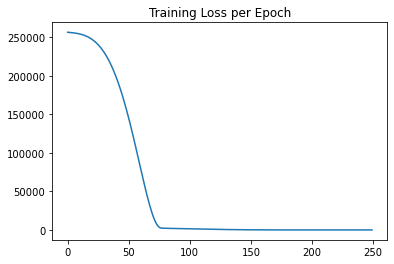

In [24]:
sns.lineplot(
    x=range(len(loss)),
    y=loss
)
plt.title('Training Loss per Epoch')

### Compare final evaluation (MSE) on training set and test set

These should hopefully be fairly close to each other.

In [25]:
model.metrics_names

['loss']

In [26]:
training_score = model.evaluate(X_train, y_train)
training_score

22/22 [==============================] - 0s 2ms/step - loss: 23.7563


23.756269454956055

In [27]:
test_score = model.evaluate(X_test, y_test)
test_score

10/10 [==============================] - 0s 2ms/step - loss: 25.3114


25.31138038635254

<font color=magenta>
<b>Mean Squared Error (MSE)</b> is the most commonly used loss function for regression. The loss is the mean overseen data of the squared differences between true and predicted values, or writing it as a formula.
</font>

$$
MSE(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where
- $y_i$: true values
- $\hat{y}_i$: predicted values
- $n$: total number of data points

### Further Evaluations

In [28]:
test_predictions = model.predict(X_test)

In [29]:
test_predictions

array([[405.65005],
       [624.1854 ],
       [592.74304],
       [572.79004],
       [366.89786],
       [579.76294],
       [515.52893],
       [459.54965],
       [549.7795 ],
       [447.9489 ],
       [612.417  ],
       [549.52234],
       [419.47623],
       [409.22824],
       [651.95374],
       [437.70966],
       [508.9713 ],
       [660.6008 ],
       [663.27014],
       [566.119  ],
       [334.48047],
       [445.24432],
       [382.84634],
       [379.08203],
       [567.1648 ],
       [611.2064 ],
       [532.91345],
       [428.25302],
       [656.1152 ],
       [414.46472],
       [443.0566 ],
       [485.5931 ],
       [438.8204 ],
       [682.55774],
       [425.1625 ],
       [418.05093],
       [502.44498],
       [551.0284 ],
       [510.20877],
       [395.6777 ],
       [619.2372 ],
       [417.01218],
       [605.07587],
       [446.394  ],
       [502.4758 ],
       [582.3385 ],
       [669.72974],
       [490.88602],
       [318.83914],
       [485.89014],


In [30]:
test_predictions = pd.Series(test_predictions.reshape(300,))
test_predictions

0      405.650055
1      624.185425
2      592.743042
3      572.790039
4      366.897858
          ...    
295    529.554504
296    515.789246
297    610.282593
298    417.344025
299    411.232574
Length: 300, dtype: float32

In [31]:
pred_df = pd.DataFrame({
    'Test Y': y_test,
    'Model Predictions': test_predictions
})

pred_df

,Test Y,Model Predictions
0,402.296319,405.650055
1,624.156198,624.185425
2,582.455066,592.743042
3,578.588606,572.790039
4,371.224104,366.897858
...,...,...
295,525.704657,529.554504
296,502.909473,515.789246
297,612.727910,610.282593
298,417.569725,417.344025


<AxesSubplot:xlabel='Model Predictions', ylabel='Test Y'>

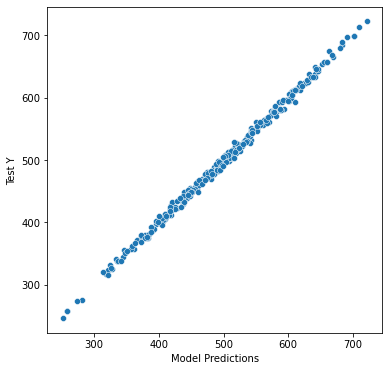

In [32]:
# Vizualize the relationship between the true values and predicted values
plt.figure(figsize=(6, 6))
sns.scatterplot(data=pred_df, x='Model Predictions', y='Test Y')

In [33]:
# Calculate the error (differences between true values and predicted value)
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

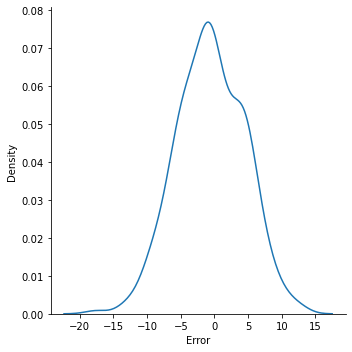

In [34]:
# Vizualize the distribution of the error
sns.displot(pred_df['Error'], kind='kde')

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
mean_absolute_error(pred_df['Test Y'], pred_df['Model Predictions'])

4.0449665556126515

In [37]:
mean_squared_error(pred_df['Test Y'], pred_df['Model Predictions'])

25.311384248798767

In [38]:
# Essentially the same thing, difference just due to precision
test_score

25.31138038635254

In [39]:
# Root Mean Squared Error (RMSE) is the squared root of the mean of the squared errors
test_score**0.5

5.03104168004525

## Predicting on Brand New Data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [40]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [41]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [42]:
new_gem = scaler.transform(new_gem)

In [43]:
model.predict(new_gem)

array([[420.03934]], dtype=float32)

## Saving and Loading a Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save('gem_price_model.h5') # creates a HDF5 file 'gem_price_model.h5'

In [46]:
later_model = load_model('gem_price_model.h5')

In [47]:
later_model.predict(new_gem)

array([[420.03934]], dtype=float32)